In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
from scripts.dataloader import DataLoader
import pandas as pd

In [3]:
dataloader = DataLoader()
df = dataloader.read_data('../data', 'AdSmartABdata.csv')

In [4]:
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


### Divide the dataset in to control and exposed groups

In [5]:
control_df = df[df["experiment"] == "control"]
exposed_df = df[df["experiment"] == "exposed"]

In [6]:
control_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,control,2020-07-03,15,Samsung SM-G960F,6,Facebook,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,control,2020-07-09,5,Samsung SM-G973F,6,Facebook,0,0


In [7]:
exposed_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
8,004940f5-c642-417a-8fd2-c8e5d989f358,exposed,2020-07-04,0,Generic Smartphone,6,Chrome Mobile WebView,0,0
13,006b9c6e-5f5d-4385-a811-ff20a24b30ac,exposed,2020-07-06,8,Samsung SM-G973F,6,Chrome Mobile WebView,0,0


### Select all users that reacted to yes/no

In [8]:
yes_users_control = control_df[control_df["yes"]== 1]
yes_users_exposed = exposed_df[exposed_df["yes"]== 1]
no_users_control = control_df[control_df["no"]== 1]
no_users_exposed = exposed_df[exposed_df["no"]== 1]

In [9]:
#Drop yes, and no columns
yes_users_control = yes_users_control.drop(['yes','no'], axis = 1)
yes_users_exposed = yes_users_exposed.drop(['yes','no'], axis = 1)
no_users_control = no_users_control.drop(['yes','no'], axis = 1)
no_users_exposed = no_users_exposed.drop(['yes','no'], axis = 1)
#Add a reaction column
yes_users_control["reaction"] = 1
yes_users_exposed["reaction"] = 1
no_users_control["reaction"] = 0
no_users_exposed["reaction"] = 0

In [10]:
merged_control = pd.concat([yes_users_control, no_users_control])
merged_exposed = pd.concat([yes_users_exposed, no_users_exposed])
merged_df = pd.concat([merged_control, merged_exposed])

In [11]:
yes_users_control.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
100,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
118,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1
157,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1


In [12]:
yes_users_exposed.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
128,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
144,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1


In [13]:
merged_control.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
45,018af862-486e-4da1-a85b-71872120e57c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,1
100,0332a7f7-0336-4d48-96ad-75da00d916c0,control,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
118,03948b84-b5b1-4f26-81fc-e953218aef1a,control,2020-07-09,20,Samsung SM-G930F,6,Facebook,1
157,04b69bd8-4849-4489-adcf-08b96a265c40,control,2020-07-07,15,Generic Smartphone,6,Chrome Mobile,1


In [14]:
no_users_control.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
48,01985992-d70b-4258-a3a1-60ac5e17bce6,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0
62,023458f7-122d-475f-9525-1b9a3cc7a033,control,2020-07-03,15,MRD-LX1,6,Facebook,0
99,0332792f-0de9-4902-9d08-06033c3d8371,control,2020-07-06,2,Samsung SM-J600FN,6,Chrome Mobile WebView,0
101,0336ce2b-c5cb-454a-b74f-450232223742,control,2020-07-03,15,Samsung SM-A105FN,6,Samsung Internet,0


In [15]:
merged_exposed.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
65,023ec7b5-cb8f-49a5-995f-e0d7c2f702e5,exposed,2020-07-09,13,Samsung SM-G935F,6,Facebook,1
89,02efdb70-8596-4f3f-b0b2-b91e194f61f7,exposed,2020-07-05,6,Generic Smartphone,6,Chrome Mobile,1
128,03ee1780-1fa3-4bec-926c-d543a81a6653,exposed,2020-07-04,11,Samsung SM-G981B,6,Chrome Mobile WebView,1
144,046644f4-b30c-48f9-b069-f804a97b77d9,exposed,2020-07-05,2,Generic Smartphone,6,Chrome Mobile WebView,1


### Shuffle rows

In [16]:
merged_exposed = merged_exposed.sample(frac=1).reset_index(drop=True)
merged_control = merged_control.sample(frac=1).reset_index(drop=True)
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

In [17]:
merged_df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
0,13b9e571-0e68-4cd3-a804-e335800be9e5,control,2020-07-10,9,Generic Smartphone,6,Chrome Mobile,0
1,503b0496-37a7-4344-ad59-e1562791ae47,exposed,2020-07-09,0,Generic Smartphone,6,Chrome Mobile,0
2,1134407e-af87-434f-ac7c-299dff13dae2,control,2020-07-04,21,Samsung SM-A705FN,6,Facebook,0
3,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,control,2020-07-10,4,Generic Smartphone,6,Chrome Mobile,0
4,0587d2d4-d47a-4872-ace2-a460eea468f3,exposed,2020-07-09,1,Generic Smartphone,6,Chrome Mobile,1
5,f890cc03-b7f9-4bf0-b6d3-cceaf2e4a8cb,exposed,2020-07-03,5,Generic Smartphone,6,Chrome Mobile,0
6,77137249-edf0-48b0-9f85-7972cc0871a9,control,2020-07-10,17,ELE-L29,6,Facebook,1
7,9a1735fe-3cbf-41c1-ba89-a57a6e2d00ba,exposed,2020-07-08,18,Nokia undefined$2$3,6,Chrome Mobile,1
8,d97c5289-6836-426d-a402-6aac1fec97a9,exposed,2020-07-03,13,OnePlus ONEPLUS A3000,6,Chrome Mobile WebView,1
9,c64fa38e-3ada-4e59-bce0-d7e02c0ea7fb,exposed,2020-07-03,3,Generic Smartphone,6,Chrome Mobile,0


In [18]:
merged_exposed.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
0,9a685f5c-8764-48cb-9b43-a3f91249a208,exposed,2020-07-07,20,Generic Smartphone,6,Chrome Mobile,1
1,5434ebb8-0685-4bce-b994-1bbff94c6c30,exposed,2020-07-08,17,Generic Smartphone,6,Chrome Mobile,1
2,22bd20bf-4ab6-4be8-a28a-2637551aa2e7,exposed,2020-07-08,16,Generic Smartphone,6,Chrome Mobile,0
3,896f1a69-489e-4a97-85d0-267cee43f5bf,exposed,2020-07-10,7,Generic Smartphone,6,Chrome Mobile,0
4,f63133b5-7748-4423-bca9-6e5b409a53e6,exposed,2020-07-08,14,Generic Smartphone,6,Chrome Mobile WebView,0


In [19]:
merged_control.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
0,496d6147-d6b7-4f4a-b36f-331db8d53fea,control,2020-07-10,6,Samsung SM-G973F,6,Chrome Mobile WebView,1
1,ab235a96-9659-4bf4-969e-b6f55800fdfd,control,2020-07-08,17,Generic Smartphone,6,Chrome Mobile,0
2,de032d20-06c5-4a85-b9fe-f363230cfba4,control,2020-07-08,10,Generic Smartphone,6,Chrome Mobile,1
3,54a68ad2-eed9-408e-9088-ddecfa64b0fd,control,2020-07-03,15,iPhone,5,Mobile Safari UI/WKWebView,0
4,a6adac76-e627-44ca-8100-1d7425083881,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


### Label Encoding

In [20]:
from sklearn import preprocessing
def label_encoder(df):
    date_encoder = preprocessing.LabelEncoder()
    device_encoder = preprocessing.LabelEncoder()
    expt_encoder = preprocessing.LabelEncoder()
    browse_encoder = preprocessing.LabelEncoder()
    df["date"] = date_encoder.fit_transform(df["date"])
    df["experiment"] = expt_encoder.fit_transform(df["experiment"])
    df["device_make"] = device_encoder.fit_transform(df["device_make"])
    df["browser"] = browse_encoder.fit_transform(df["browser"])
    return df

In [21]:
merged_encoded = label_encoder(merged_df)

In [22]:
merged_encoded.tail(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,reaction
1233,45db7e60-c14b-4f17-99b7-820ee4080fcc,1,6,18,68,6,2,1
1234,c80d0341-28c1-48ec-ad05-7c8e56c2a58b,0,2,12,77,6,7,0
1235,fb859fbe-dafe-4052-8a16-6c5d2e26fb94,0,7,10,112,6,4,1
1236,b1d20e51-caa7-4a6f-b802-37c9a399e036,1,0,11,48,6,2,0
1237,594ecca2-51fe-4e43-9bcb-38ba4790a2b1,0,0,15,13,6,1,0
1238,f27fb7fa-fe23-43d4-bcd0-8baa18774dd3,0,0,15,35,6,4,1
1239,67462dcc-3c3c-4640-b3f5-f9b0cfa2ce0a,0,6,10,68,6,4,1
1240,4af0156c-3371-4d6a-8e62-6ff6d1432368,0,6,12,42,6,1,0
1241,c8debff5-48be-4a6e-9a6b-eab3d676bdb8,0,2,10,68,6,2,0
1242,b84ee86d-aee1-4f0f-84f7-4820eba84c29,1,4,1,97,6,2,1


### Split data by browser and platform_os

In [23]:
def split_data(df):
    browser_cols = ["auction_id","experiment","date","hour","device_make","browser","reaction"]
    platform_cols = ["auction_id","experiment", "date","hour","device_make","platform_os","reaction"]
    df_browser = df[browser_cols]
    df_platform = df[platform_cols]
    return df_browser, df_platform

In [24]:
browser_df, platform_df = split_data(merged_encoded)

In [25]:
browser_df.head()

,auction_id,experiment,date,hour,device_make,browser,reaction
0,13b9e571-0e68-4cd3-a804-e335800be9e5,0,7,9,13,1,0
1,503b0496-37a7-4344-ad59-e1562791ae47,1,6,0,13,1,0
2,1134407e-af87-434f-ac7c-299dff13dae2,0,1,21,54,4,0
3,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,0,7,4,13,1,0
4,0587d2d4-d47a-4872-ace2-a460eea468f3,1,6,1,13,1,1


In [26]:
platform_df.head()

,auction_id,experiment,date,hour,device_make,platform_os,reaction
0,13b9e571-0e68-4cd3-a804-e335800be9e5,0,7,9,13,6,0
1,503b0496-37a7-4344-ad59-e1562791ae47,1,6,0,13,6,0
2,1134407e-af87-434f-ac7c-299dff13dae2,0,1,21,54,6,0
3,6d0b7da0-7798-4b70-88c2-f94e5ab65cb6,0,7,4,13,6,0
4,0587d2d4-d47a-4872-ace2-a460eea468f3,1,6,1,13,6,1


### Modeling

#### Logistic regression

In [27]:
from scripts.loggistic_train import logistic_regression

### Train using browser data

Feature: 0, Score: 0.01426
Feature: 1, Score: 0.00381
Feature: 2, Score: 0.03133
Feature: 3, Score: 0.00201
Feature: 4, Score: -0.06883


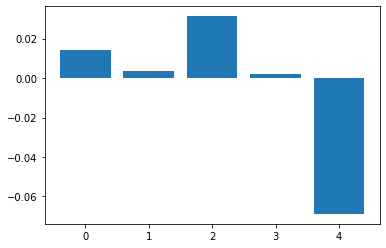

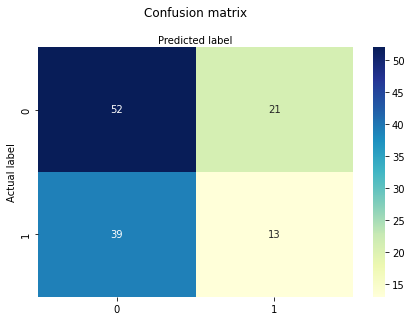

              precision    recall  f1-score   support

         Yes       0.57      0.71      0.63        73
          No       0.38      0.25      0.30        52

    accuracy                           0.52       125
   macro avg       0.48      0.48      0.47       125
weighted avg       0.49      0.52      0.50       125



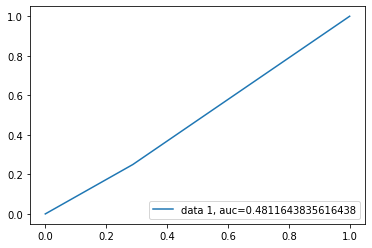

Model saved in run 50aa0770aae84593a52560b84502ede8


/home/hmicheal/.conda/envs/10x/lib/python3.10/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [28]:
logistic_regression(browser_df)

### Train Using Platform data

Feature: 0, Score: 0.15912
Feature: 1, Score: -0.00767
Feature: 2, Score: 0.03337
Feature: 3, Score: 0.00038
Feature: 4, Score: 0.60984


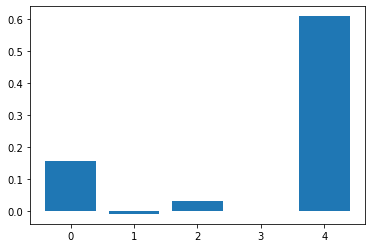

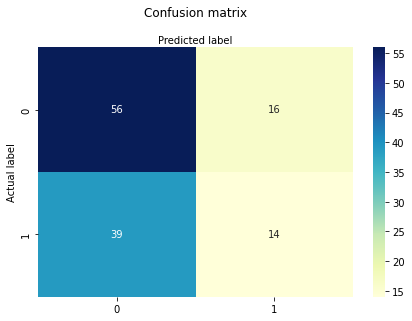

              precision    recall  f1-score   support

         Yes       0.59      0.78      0.67        72
          No       0.47      0.26      0.34        53

    accuracy                           0.56       125
   macro avg       0.53      0.52      0.50       125
weighted avg       0.54      0.56      0.53       125



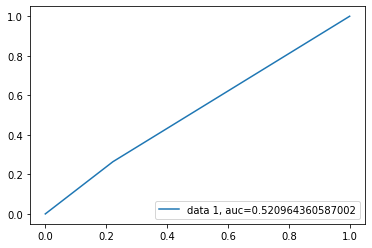

Model saved in run 50aa0770aae84593a52560b84502ede8


In [29]:
logistic_regression(platform_df)

### Random Forest

In [30]:
from scripts.randomforest_train import randomforest_train

### Train using browser data

Feature: 0, Score: 0.07352
Feature: 1, Score: 0.22739
Feature: 2, Score: 0.34617
Feature: 3, Score: 0.26127
Feature: 4, Score: 0.09166


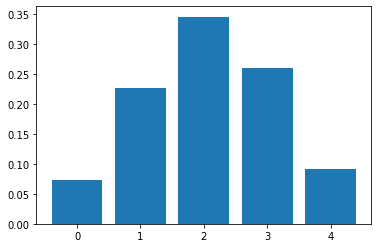

Model saved in run 50aa0770aae84593a52560b84502ede8


In [31]:
randomforest_train(browser_df)

### Train using platform data

Feature: 0, Score: 0.07309
Feature: 1, Score: 0.23962
Feature: 2, Score: 0.37570
Feature: 3, Score: 0.30941
Feature: 4, Score: 0.00218


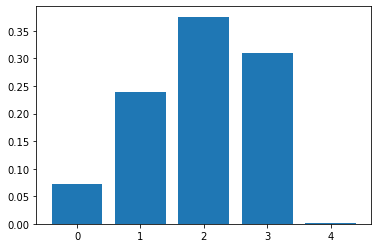

Model saved in run 50aa0770aae84593a52560b84502ede8


In [32]:
randomforest_train(platform_df)

### XGboost

### Train using browser data

In [33]:
from scripts.xgboost_train import xgboost_train

Feature: 0, Score: 0.04975
Feature: 1, Score: 0.14183
Feature: 2, Score: 0.25060
Feature: 3, Score: 0.43080
Feature: 4, Score: 0.12702


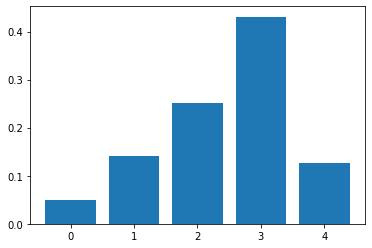

Model saved in run 50aa0770aae84593a52560b84502ede8


In [34]:
xgboost_train(browser_df)

### Train Using Platform data

Feature: 0, Score: 0.08231
Feature: 1, Score: 0.16592
Feature: 2, Score: 0.27227
Feature: 3, Score: 0.47636
Feature: 4, Score: 0.00315


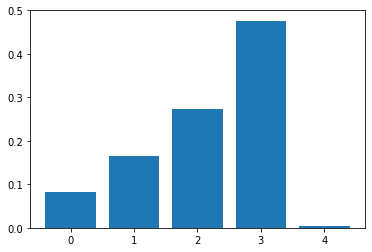

Model saved in run 50aa0770aae84593a52560b84502ede8


In [35]:
xgboost_train(platform_df)